In [ ]:
!pip install numpy
!pip install pyopenms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.0 MB 216 kB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

import cv2
import pandas as pd
!pip install molmass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.6 MB/s 


# compound group selection and extraction of masses

In [ ]:
from molmass import Formula
H1_MASS = 1.007825

# read lists of compounds and masses
compounds = pd.read_csv("/content/gdrive/MyDrive/XCMS/data/IS.csv")
df=compounds.iloc[:,1]
df2=compounds.iloc[:,0]
comps = []
for i in df2:
  comps.append(i)
weights=[]
for line in df:
  f = Formula(line)
  molweight=f.isotope.mass
  weights.append(molweight)
finweights=[]
for i in weights: 
  i+=H1_MASS
  finweights.append(i)

print(finweights)


[357.06176480495003, 345.1039664008, 427.12470184569]


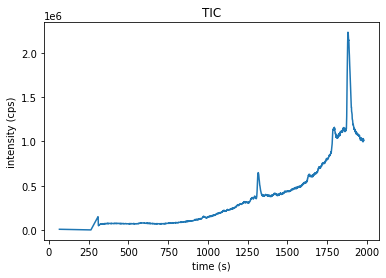

In [ ]:
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np

def mzRange (comps, r):
  data_matrix = []
  for i in comps:
    irange=[i-r,i+r]
    data_matrix.append(irange)
  return data_matrix


ranges = mzRange(finweights,0.5)
exp = MSExperiment()
MzDataFile().load("/content/gdrive/MyDrive/XCMS/data/2022_10_18_IS_33min.mzdata.xml", exp)
tic = exp.calculateTIC()
retention_times, intensities = tic.get_peaks()
retention_times = [spec.getRT() for spec in exp]
intensities = [sum(spec.get_peaks()[1]) for spec in exp if spec.getMSLevel() == 1]

# 3) get TIC data looping over spectra in MSExperiment()
retention_times = []
intensities = []
for spec in exp:
    if spec.getMSLevel() == 1:
        retention_times.append(spec.getRT())
        intensities.append(sum(spec.get_peaks()[1]))

# plot retention times and intensities and add labels
plt.plot(retention_times, intensities)

plt.title('TIC')
plt.xlabel('time (s)')
plt.ylabel('intensity (cps)')

plt.show()


# Code for Individual fragment pools

[300.45682, 248.00735, 227.18382, 279.06668, 295.48148, 250.9, 302.3393, 223.00862, 204.21053, 351.4745, 302.13626, 261.22244, 258.60358, 404.12628, 292.125, 268.20917, 295.35538, 329.85196, 271.91666, 302.40897, 305.34964, 281.45, 303.63373, 292.23148, 304.91718, 314.625, 268.044, 275.02615, 313.95, 280.1113, 254.67905, 273.65442, 318.6713, 323.92923, 330.22714, 263.14816, 264.32144, 333.98892, 301.67783, 312.6953, 307.53162, 319.79892, 264.79718, 284.38022, 272.65442, 269.72, 294.32065, 286.70456, 287.13297, 288.47116, 233.125, 275.3611, 310.35715, 266.42856, 319.0475, 216.08035, 264.0, 304.00363, 256.125, 330.07144, 376.90375, 328.34784, 328.26666, 247.38564, 227.01086, 289.2404, 231.9375, 271.59558, 261.45728, 249.17287, 254.25, 259.3706, 247.78676, 310.96323, 322.1734, 360.93094, 292.1601, 342.005, 304.00595, 380.2802, 252.67223, 267.6129, 332.10886, 354.6123, 280.56403, 311.5079, 306.0098, 306.78946, 242.35175, 427.64233, 268.92746, 258.22, 325.0011, 295.65384, 236.02777, 225.920

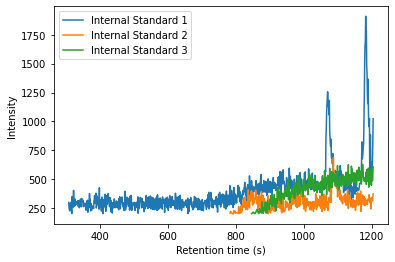

In [ ]:
def plotDetectedFeatures3D(raw,weights,compounds):
  rtforplot=list(range(1, 1990,1))
  exp = MSExperiment()
  MzDataFile().load(raw, exp)
  for mass in weights:
    intenforplot=[]
    rtlist=[]
    for i in range (1,1205):
      spectrum=exp.getSpectrum(i)
      mz, intensity = spectrum.get_peaks()
      for m in mz:
        if m>(mass-0.5) and m<(mass+0.5):
          index=np.where(mz==m)
          #print(index[0])
          intenforplot.append(intensity[index[0][0]])
          rtlist.append(i)
          break
    #plt.figure(figsize=(20,16))
    comind=weights.index(mass) 
    print(intenforplot)
    plt.plot(rtlist,intenforplot,label=compounds[comind])
    #plt.title(compounds[comind])
  #plt.figure(figsize=(20,16))
  plt.xlabel("Retention time (s)")
  plt.ylabel("Intensity")
  plt.legend()
  plt.savefig("/content/gdrive/MyDrive/XCMS/plots/18mins.pdf")


plotDetectedFeatures3D("/content/gdrive/MyDrive/XCMS/data/2022_10_18_IS_18min.mzdata.xml",finweights,comps)

# Code for Overlaying data from different spectra

In [ ]:
def plotDetectedFeatures(raw1,raw2,weights,compounds):
  rtforplot=list(range(1, 1990,1))
  exp1 = MSExperiment()
  MzDataFile().load(raw1, exp1)
  exp2 = MSExperiment()
  MzDataFile().load(raw2,exp2)
  for mass in weights:
    intenforplot1=[]
    rtlist1=[]
    intenforplot2=[]
    rtlist2=[]
    for i in range (1,1205):
      spectrum1=exp1.getSpectrum(i)
      mz, intensity = spectrum1.get_peaks()
      for m in mz:
        if m>(mass-0.5) and m<(mass+0.5):
          index=np.where(mz==m)
          #print(index[0])
          intenforplot1.append(intensity[index[0][0]])
          rtlist1.append(i)
          break
    for i in range (1,1205):
      spectrum2=exp2.getSpectrum(i)
      mz, intensity = spectrum2.get_peaks()
      for m in mz:
        if m>(mass-0.5) and m<(mass+0.5):
          index=np.where(mz==m)
          #print(index[0])
          intenforplot2.append(intensity[index[0][0]])
          rtlist2.append(i)
          break
    comind=weights.index(mass) 
    plt.plot(rtlist1,intenforplot1)
    #plt.plot(rtlist2,intenforplot2)
    plt.title(compounds[comind])
    plt.xlabel("Retention time (s)")
    plt.ylabel("Intensity")
    #plt.legend()
    plt.savefig("/content/gdrive/MyDrive/XCMS/plots/%s_18min.pdf" %compounds[comind])
    plt.close() 


plotDetectedFeatures("/content/gdrive/MyDrive/XCMS/data/2022_10_18_IS_18min.mzdata.xml","/content/gdrive/MyDrive/XCMS/data/2022_10_18_IS_20min.mzdata.xml",finweights,comps)

# Peak Integration (TIC)

In [ ]:
import csv
def TICcalculation(raw,weights,compounds):
  exp = MSExperiment()
  MzDataFile().load(raw, exp)
  peak_integration = []
  for mass in weights:
    intens=[]
    for i in range (1,1988):
      spectrum=exp.getSpectrum(i)
      mz, intensity = spectrum.get_peaks()
      for m in mz:
        if m>(mass-0.5) and m<(mass+0.5):
          index=np.where(mz==m)
          #print(index[0])
          intens.append(intensity[index[0][0]])
          break
    integration = sum(intens)
    peak_integration.append(integration)
  dictionary = dict(zip(compounds,peak_integration))
  #csv_columns = ['Compound ID','Peak Integration']
  #csv_file = "/content/gdrive/MyDrive/XCMS/peak_integration/20220608_pool5_hiscolumn_exp.csv"
 # with open(csv_file, 'w') as csvfile:
    #writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    #writer.writeheader()
    #writer.writerows(dictionary)
  return dictionary



TICcalculation("/content/gdrive/MyDrive/XCMS/data/220210923_pool2.mzdata.xml",finweights,comps)

RuntimeError: ignored